In [1]:
import requests
import os
import pandas as pd

#### Attempt to scrape Yelp API, but didn't end up using it.

In [6]:
def get_access_token():
    response = requests.post('https://api.yelp.com/oauth2/token',
                             data={'grand_type': 'client_credentials',
                             'client_id': 'nWRk-pKyN3NxXCguLh-cQA',
                             'client_secret': '6TKmxwiPXyFBfdKdsD9TQFJ9TNs0WEWqCOvB64yebCeBuLZETG8r4xPtc61vA7Xr'})
    return response.json()['access_token']



### Look at New York to Predict DC

There will be some challenges as it will be a small data set and the size of the cities as well as the perceived quality of the cities' restaurants may differ. It is important to note that this is the 5th city to come. LA which was the 4th didn't have one 3 star and no longer has a Michelin Guide.




#### Michelin’s Bib Gourmand list of more affordable eateries awarded 19. New York has 133. 

In [7]:
def get_search(loc,sor,pri,ter):
    access_token = get_access_token()
    base_url = "https://api.yelp.com/v3/businesses/search?"
    search_terms = "location=%s&categories=restaurants&sort_by=%s&price=%s&term=%s"
    response = requests.get(base_url + search_terms % (loc,sor,pri,ter),
                            headers={'Authorization': 'Bearer %s' % access_token})
    search_result = response.json()
    return search_result

In [8]:
restaurant=get_search("Washington DC", 'rating', '2,3,4', 'michelin')

In [50]:
restaurant_sample=get_search("Washington DC", 'rating', '2,3,4', 'Komi')

In [55]:
restaurant_sample

{u'businesses': [{u'categories': [{u'alias': u'greek', u'title': u'Greek'},
    {u'alias': u'mediterranean', u'title': u'Mediterranean'}],
   u'coordinates': {u'latitude': 38.91012, u'longitude': -77.03813},
   u'id': u'komi-washington',
   u'image_url': u'https://s3-media2.fl.yelpcdn.com/bphoto/YQwWin7DTqZf0fYHtK05WA/o.jpg',
   u'location': {u'address1': u'1509 17th St NW',
    u'address2': None,
    u'address3': u'',
    u'city': u'Washington',
    u'country': u'US',
    u'state': u'DC',
    u'zip_code': u'20036'},
   u'name': u'Komi',
   u'phone': u'+12023329200',
   u'price': u'$$$$',
   u'rating': 4.5,
   u'review_count': 644,
   u'url': u'https://www.yelp.com/biz/komi-washington?adjust_creative=nWRk-pKyN3NxXCguLh-cQA&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=nWRk-pKyN3NxXCguLh-cQA'},
  {u'categories': [{u'alias': u'thai', u'title': u'Thai'}],
   u'coordinates': {u'latitude': 38.91012, u'longitude': -77.03813},
   u'id': u'little-serow-washington',
   u

In [367]:
# restaurant

In [ ]:
restaurant=get_search("Washington DC", 'rating', '2,3,4', '')

In [11]:

list_rest=[]
for i,j in enumerate(restaurant['businesses']):
    r_dict={}
    r_dict['name']=restaurant['businesses'][i]['name']
    r_dict['rating']=restaurant['businesses'][i]['rating']
    r_dict['price']=restaurant['businesses'][i]['price']
    r_dict['review_count']=restaurant['businesses'][i]['review_count']
    r_dict['categories']=restaurant['businesses'][i]['categories']
    r_dict['id']=restaurant['businesses'][i]['id']
    r_dict['city']=restaurant['businesses'][i]['location']['city']
    list_rest.append(r_dict)

In [12]:
# yelp_restaurants = pd.DataFrame(list_rest)

In [13]:
# yelp_restaurants

,categories,city,id,name,price,rating,review_count
0,"[{u'alias': u'greek', u'title': u'Greek'}, {u'...",Washington,komi-washington,Komi,$$$$,4.5,644
1,"[{u'alias': u'newamerican', u'title': u'Americ...",Washington,barmini-by-josé-andrés-washington-4,Barmini By José Andrés,$$$,4.5,203
2,"[{u'alias': u'indpak', u'title': u'Indian'}]",Washington,rasika-washington,Rasika,$$$,4.5,2228
3,"[{u'alias': u'newamerican', u'title': u'Americ...",Washington,minibar-by-josé-andrés-washington-7,minibar by José Andrés,$$$$,4.5,253
4,"[{u'alias': u'breakfast_brunch', u'title': u'B...",Washington,pineapple-and-pearls-washington-3,Pineapple & Pearls,$$$$,4.5,81
5,"[{u'alias': u'french', u'title': u'French'}, {...",Washington,marcels-by-robert-wiedmaier-washington,Marcel's by Robert Wiedmaier,$$$$,4.5,375
6,"[{u'alias': u'filipino', u'title': u'Filipino'}]",Washington,bad-saint-washington,Bad Saint,$$,4.5,195
7,"[{u'alias': u'italian', u'title': u'Italian'}]",Washington,fiola-washington,Fiola,$$$$,4.0,480
8,"[{u'alias': u'tradamerican', u'title': u'Ameri...",Washington,plume-washington,Plume,$$$$,4.0,150
9,"[{u'alias': u'newamerican', u'title': u'Americ...",Washington,westend-bistro-washington,Westend Bistro,$$$,3.5,258


In [16]:
yelp_restaurants.name

0                            Komi
1          Barmini By José Andrés
2                          Rasika
3          minibar by José Andrés
4              Pineapple & Pearls
5    Marcel's by Robert Wiedmaier
6                       Bad Saint
7                           Fiola
8                           Plume
9                  Westend Bistro
Name: name, dtype: object

In [84]:
dc_restaurants = ['Pineapple and Pearls', 'Komi', 'Minibar', 'Fiola', 'Metier', 'Fiola Mare', 'Kinship',
'Little Serow', 'Source', 'Tail Up Goat', 'Bad Saint', "Marcel'''s"] 

list_dc = []
for restaurant in dc_restaurants:
    restaurant=get_search("Washington DC", 'rating', '2,3,4', '')
    
    list_rest=[]
    for i,j in enumerate(restaurant['businesses']):
        r_dict={}
        r_dict['name']=restaurant['businesses'][i]['name']
        r_dict['rating']=restaurant['businesses'][i]['rating']
        r_dict['price']=restaurant['businesses'][i]['price']
        r_dict['review_count']=restaurant['businesses'][i]['review_count']
        r_dict['categories']=restaurant['businesses'][i]['categories']
        r_dict['id']=restaurant['businesses'][i]['id']
        r_dict['city']=restaurant['businesses'][i]['location']['city']
    list_rest.append(r_dict)
    
list_dc.append(list_rest)


In [69]:
df

,0
0,"{u'rating': 4.5, u'review_count': 746, u'name'..."
1,"{u'rating': 4.5, u'review_count': 746, u'name'..."
2,"{u'rating': 4.5, u'review_count': 746, u'name'..."
3,"{u'rating': 4.5, u'review_count': 746, u'name'..."
4,"{u'rating': 4.5, u'review_count': 746, u'name'..."
5,"{u'rating': 4.5, u'review_count': 746, u'name'..."
6,"{u'rating': 4.5, u'review_count': 746, u'name'..."
7,"{u'rating': 4.5, u'review_count': 746, u'name'..."
8,"{u'rating': 4.5, u'review_count': 746, u'name'..."
9,"{u'rating': 4.5, u'review_count': 746, u'name'..."


## Zagat it is. 

Not only do I not have to deal with Yelp users, but probably people that are just praising Michelin restaurants. I will use Zagat's New York restaurants and have a list of NYC's top 50 restaurants and use that as a training set. 

#### Import list of New York Zagat related restaurants 

In [369]:
df = pd.read_csv('~/Desktop/zagat_revised.csv',header=None)
df

,0,1,2,3,4,5,6,7
0,3,BERNARDIN,Sea,West 50s,4.9,4.8,4.9,4
1,1,BOULEY,French,TriBeCa,4.9,4.8,4.8,4
2,2,DANIEL,French,East 60s,4.9,4.8,4.9,4
3,3,JEAN-GEORGES,French,West 60s,4.8,4.8,4.8,4
4,1,GOTHAM BAR AND GRILL,American,Greenwich Village,4.8,4.6,4.7,4
5,1,PETER LUGER STEAK HOUSE,Steakhouse,Williamsburg,4.8,3.7,4.2,4
6,3,ELEVEN MADISON PARK,NaN,Flatiron,4.8,4.8,4.8,4
7,1,BLUE HILL,American,Greenwich Village,4.8,4.3,4.7,4
8,3,PER SE,New American,West 50s,4.8,4.7,4.8,4
9,1,GRAMERCY TAVERN,American,Flatiron,4.8,4.6,4.7,4


In [370]:
columns = ['Num_Michelin_Stars','Name','Type','Neighborhood','Food','Decor','Service','Price']

In [371]:
df.columns = columns

In [372]:
df.head()

,Num_Michelin_Stars,Name,Type,Neighborhood,Food,Decor,Service,Price
0,3,BERNARDIN,Sea,West 50s,4.9,4.8,4.9,4
1,1,BOULEY,French,TriBeCa,4.9,4.8,4.8,4
2,2,DANIEL,French,East 60s,4.9,4.8,4.9,4
3,3,JEAN-GEORGES,French,West 60s,4.8,4.8,4.8,4
4,1,GOTHAM BAR AND GRILL,American,Greenwich Village,4.8,4.6,4.7,4


#### Since we are going to be predicting both whether it receives a star and what type of star it is, we will create a new column. We could predict 1,2, or 3 star, but I am going to presume that DC will be lucky to get 1 3 star and a few 2 star so will attempt to predict Michelin.

In [373]:
def is_Michelin(x):
    if x>0:
        return 1
    else:
        return 0

In [374]:
df['Michelin'] = df['Num_Michelin_Stars'].apply(is_Michelin)

In [375]:
df.corr()

,Num_Michelin_Stars,Food,Decor,Service,Price,Michelin
Num_Michelin_Stars,1.000000,0.547142,0.429090,0.439007,0.564291,0.822877
Food,0.547142,1.000000,0.367536,0.510090,0.453538,0.456156
Decor,0.429090,0.367536,1.000000,0.932431,0.673209,0.385111
Service,0.439007,0.510090,0.932431,1.000000,0.677379,0.396082
Price,0.564291,0.453538,0.673209,0.677379,1.000000,0.663820
Michelin,0.822877,0.456156,0.385111,0.396082,0.663820,1.000000


#### Heatmap shows a high degree of correlation between Decor and Service, but given the small sample size, I will keep both of these things

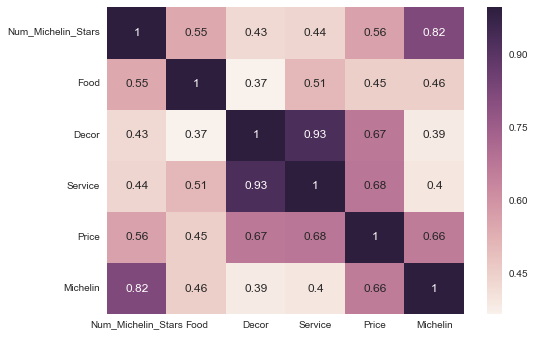

In [376]:
sns.heatmap(df.corr(), annot=True)

#### Service and Decor is somewhat correlated and something to consider for model

In [377]:
pd.crosstab(df.Num_Michelin_Stars, df.Price)

Price,2,3,4
Num_Michelin_Stars,,,
0,6,14,6
1,0,1,12
2,0,0,3
3,0,0,4


#### As you can see that from this small data set, anything 2 stars are lower will not be stars. Since this can be expected, I am going to make the final data frame even smaller and let those go. 

In [382]:
X=df[['Food','Decor','Service','Price']]
y = df.Michelin

X = StandardScaler().fit_transform(X)

# calculate cross-validated AUC
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression(C=1e9)
cross_val_score(logreg, X_train, y_train, cv=10, scoring='roc_auc').mean()



0.80000000000000004

In [404]:
logreg.fit(X_train, y_train)
logreg.predict_proba(X_test)

array([[  8.70400254e-01,   1.29471659e-01,   1.27727261e-04,
          3.59262927e-07],
       [  9.87994288e-01,   1.20056295e-02,   8.20691373e-08,
          1.22276551e-10],
       [  7.91103403e-01,   2.08781537e-01,   1.15009832e-04,
          5.02229118e-08],
       [  9.03530880e-01,   9.63383930e-02,   1.27938818e-04,
          2.78787116e-06],
       [  9.59313215e-01,   4.03965618e-02,   1.39048507e-04,
          1.51174951e-04],
       [  1.07814582e-01,   4.30671031e-01,   1.37671571e-01,
          3.23842817e-01],
       [  2.57332443e-01,   5.06805107e-01,   1.48646292e-01,
          8.72161584e-02],
       [  9.83855028e-01,   1.61448606e-02,   1.11191865e-07,
          1.90798124e-12],
       [  9.29480916e-01,   7.03704688e-02,   1.27150802e-04,
          2.14646822e-05],
       [  4.28243775e-01,   5.71756202e-01,   2.24694176e-08,
          2.92321982e-20],
       [  9.35962445e-02,   8.23673374e-01,   8.24088427e-02,
          3.21539189e-04],
       [  9.67175052e

In [408]:
predictions = logreg.predict(X_test)

In [410]:
y_test_predictions = X_test
y_test_predictions['predictions'] = predictions
y_test_predictions

,Food,Decor,Service,Price,predictions
24,4.7,4.0,4.3,3,0
35,4.6,3.9,4.1,2,0
25,4.7,3.9,4.2,3,0
26,4.7,4.2,4.4,3,0
20,4.7,4.5,4.6,3,0
6,4.8,4.8,4.8,4,1
18,4.7,4.7,4.7,4,1
43,4.6,3.3,3.9,2,0
28,4.7,4.4,4.5,3,0
32,4.6,2.6,3.0,2,1


In [411]:
X=df[['Food','Decor','Service','Price']]
y = df.Num_Michelin_Stars

from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier

cv = StratifiedKFold(y, n_folds=3, shuffle=True, random_state=41)

dt = DecisionTreeClassifier(class_weight='balanced')
s = cross_val_score(dt, X, y, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Decision Tree", s.mean().round(3), s.std().round(3))
# Decision Tree Score:	0.606 ± 0.031


In [412]:

from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz

dt = DecisionTreeClassifier(max_depth = 3, min_samples_split = 2)

dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

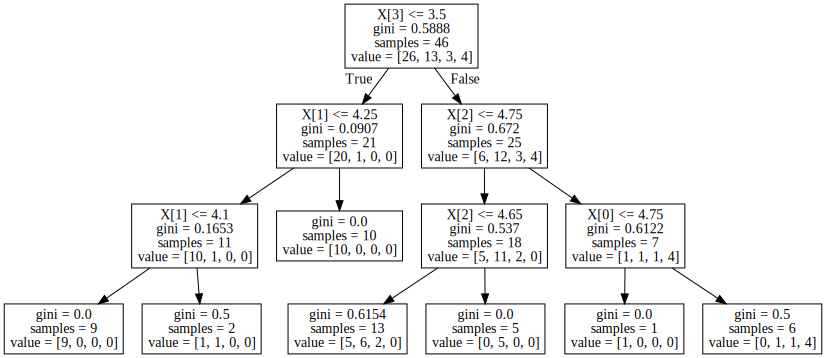

In [413]:

import graphviz

export_graphviz(dt, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [414]:

feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
Price,0.555592
Service,0.299218
Food,0.085220
Decor,0.059970


In [224]:
# # For the numerical variables
# for column in ['Food','Decor','Service','Price']:
#     X.plot.scatter(x=column, y="Num_Michelin_Stars")

In [415]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)

rf.fit(X, y)
et.fit(X,y)

ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

,dt_importance,rf_importance,et_importance
Service,0.299218,0.345849,0.290531
Decor,0.059970,0.294763,0.244062
Food,0.085220,0.195438,0.246689
Price,0.555592,0.163950,0.218718


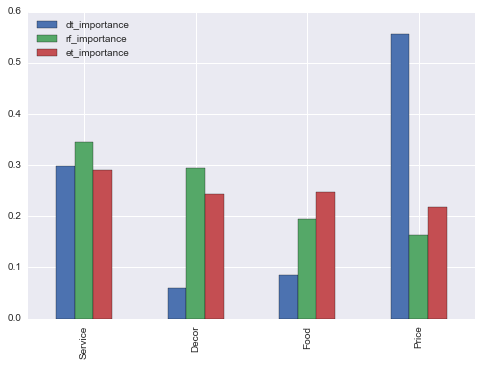

In [416]:
importances = pd.DataFrame(zip(dt.feature_importances_,
                               rf.feature_importances_,
                               et.feature_importances_),
                           index=X.columns,
                           columns=['dt_importance',
                                    'rf_importance',
                                    'et_importance']).sort_values('rf_importance',
                                                                   ascending=False)

                           
importances.plot(kind='bar')
importances.head()

In [291]:
df

,Num_Michelin_Stars,Name,Type,Neighborhood,Food,Decor,Service,Price,Michelin
0,3,BERNARDIN,Sea,West 50s,4.9,4.8,4.9,4,1
1,1,BOULEY,French,TriBeCa,4.9,4.8,4.8,4,1
2,2,DANIEL,French,East 60s,4.9,4.8,4.9,4,1
3,3,JEAN-GEORGES,French,West 60s,4.8,4.8,4.8,4,1
4,1,GOTHAM BAR AND GRILL,American,Greenwich Village,4.8,4.6,4.7,4,1
5,1,PETER LUGER STEAK HOUSE,Steakhouse,Williamsburg,4.8,3.7,4.2,4,1
6,3,ELEVEN MADISON PARK,NaN,Flatiron,4.8,4.8,4.8,4,1
7,1,BLUE HILL,American,Greenwich Village,4.8,4.3,4.7,4,1
8,3,PER SE,New American,West 50s,4.8,4.7,4.8,4,1
9,1,GRAMERCY TAVERN,American,Flatiron,4.8,4.6,4.7,4,1


In [394]:
# Make use of train, test, split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# import KNN from SKLearn, instatiate a model with one neighbor
from sklearn.neighbors import KNeighborsClassifier




# create a model with 5 neighbors. Did it improve?
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)


# predictions = knn.predict(X_test)
# df

0.91666666666666663

In [396]:
predictions = knn.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0])

In [301]:
test_df = pd.DataFrame(y_test)
test_df['predict'] = predictions
test_df



,Num_Michelin_Stars,predict
41,0,0
7,1,0
24,0,0
42,0,0
32,0,0
36,0,0
10,0,0
33,0,0
13,2,1
0,3,3


In [399]:
logreg.predict(df_to_predict_on)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [402]:
washington_contenders['contenders'] = dt.predict(df_to_predict_on)


In [418]:
washington_contenders.columns

Index([u'Name', u'Location', u'Type', u'Price', u'Food', u'Decor', u'Service',
       u'contenders'],
      dtype='object')

In [420]:
washington_contenders['contenders'] = dt.predict(df_to_predict_on)
washington_contenders[washington_contenders.contenders==1].Name

6          L'Auberge Chez Francois
9           Minibar by José Andrés
11                   The Lafayette
15                            Komi
17    MARCEL'S BY ROBERT WIEDMAIER
21                          MÉTIER
Name: Name, dtype: object

In [235]:
lm2.coef_

array([ 0.28547508,  0.07431295, -0.16725011,  0.38785749])

In [236]:
predictions = lm2.predict(X_test)

#### Obviously this model needs work. If I wasn't estimating it and according to what I read, there were about 12-15 restaurants. My model the decistion tree, given it was non-linear spit out six. 

The six that were there

L'Auberge Chez Francois
Minibar by José Andrés
The Lafayette
Komi
MARCEL'S BY ROBERT WIEDMAIER
MÉTIER


#### Washington Post predictions will be more accurate!!!

In [316]:
# clf1 = LogisticRegression(random_state=123)
# clf2 = RandomForestClassifier(random_state=123)
# clf3 = GaussianNB()
# # X = np.array([[-1.0, -1.0], [-1.2, -1.4], [-3.4, -2.2], [1.1, 1.2]])
# # y = np.array([1, 1, 2, 2])

# eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],
#                         voting='soft',
#                         weights=[1, 1, 5])

# # predict class probabilities for all classifiers
# probas = [c.fit(X, y).predict_proba(X) for c in (clf1, clf2, clf3, eclf)]

# # get class probabilities for the first sample in the dataset
# class1_1 = [pr[0, 0] for pr in probas]
# class2_1 = [pr[0, 1] for pr in probas]

In [351]:
washington_contenders = pd.read_csv('~/Desktop/contenders.csv',header=None)

In [353]:
washington_contenders.head()

,0,1,2,3,4,5,6
0,Rasika,West End,Indian,3,4.8,4.5,4.5
1,Fiola,Italian,Penn Quarter/Chinatown,3,4.8,4.7,4.7
2,Map of Monocacy Crossing Restaurant,American,Frederick,2,4.8,4.1,4.6
3,Rasika,Indian,Penn Quarter/Chinatown,2,4.8,4.5,4.5
4,Corduroy,NaN,Mount Vernon Square,3,4.8,4.5,4.6


In [361]:
columns = ['Name', 'Location', 'Type', 'Price', 'Food','Decor','Service']
washington_contenders.columns=columns



In [364]:
df_to_predict_on = washington_contenders[['Food', 'Decor', 'Service', 'Price']]



In [357]:
X_test

,Food,Decor,Service,Price
41,4.6,4.5,4.5,3
7,4.8,4.3,4.7,4
24,4.7,4.0,4.3,3
42,4.6,4.6,4.4,4
32,4.6,2.6,3.0,2
36,4.6,4.6,4.6,3
10,4.8,4.3,4.7,3
33,4.6,3.9,4.1,2
13,4.7,4.6,4.6,4
0,4.9,4.8,4.9,4


In [366]:
knn.predict_proba(df_to_predict_on)

array([[ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.75,  0.25,  0.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.25,  0.5 ,  0.  ,  0.25],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.75,  0.25,  0.  ,  0.  ],
       [ 0.75,  0.25,  0.  ,  0.  ],
       [ 0.25,  0.5 ,  0.25,  0.  ],
       [ 0.75,  0.25,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.5 ,  0.5 ,  0.  ,  0.  ],
       [ 1.  ,  0.  ,  0.  ,  0.  ],
       [ 0.75,  0.25,  0.  ,  0.  ]])

In [421]:
washington_contenders[washington_contenders.contenders==1].Name


6          L'Auberge Chez Francois
9           Minibar by José Andrés
11                   The Lafayette
15                            Komi
17    MARCEL'S BY ROBERT WIEDMAIER
21                          MÉTIER
Name: Name, dtype: object

#### Obviously this model needs work. If I wasn't estimating it and according to what I read, there were about 12-15 restaurants. My model the decistion tree, given it was non-linear spit out six. 

The six that were there

L'Auberge Chez Francois
Minibar by José Andrés
The Lafayette
Komi
MARCEL'S BY ROBERT WIEDMAIER
MÉTIER


#### My work around on the new restaurants hurt me at least according to the Washington Post predictions. 